# ML Basics Day 5: 
##### 16 April 2022 -Adithya Jayan

### Let's start from the basics

What is a neuron?
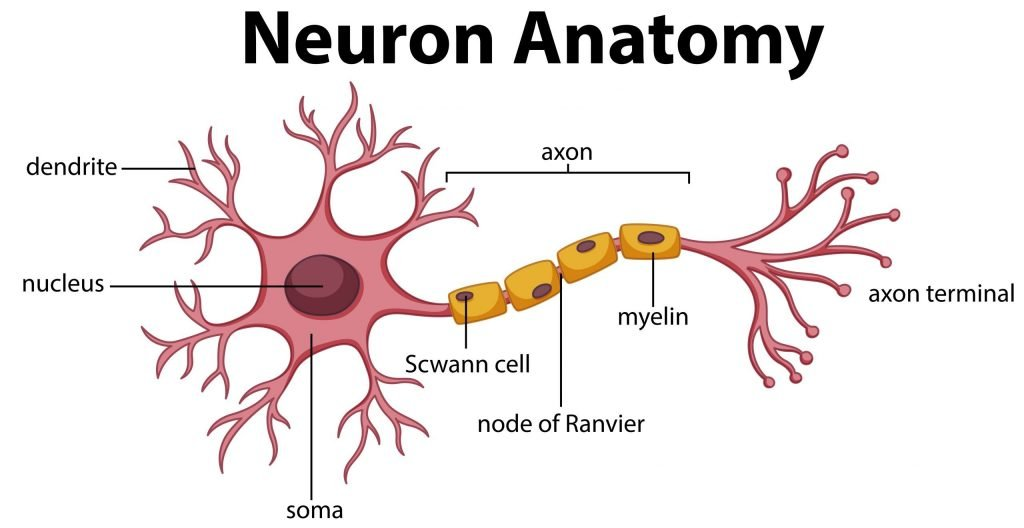

- Axon(transmitter)
- Dendrites(Recievers)

Each input to a neuron has an associated weight (w), which is assigned on the basis of its relative importance to other inputs. The node applies a function to the weighted sum of its inputs.

The idea is that the synaptic strengths (the weights w) are learnable and control the strength of influence and its direction

In the basic model, the dendrites carry the signal to the cell body where they all get summed. If the final sum is above a certain threshold, the neuron can fire, sending a spike along its axon.

We try to make something similar in our neural networks too:
- The weights are trainable parameters and is used to calculate the output as a weighted sum of inputs
- The firing rate of the neuron, is modelled as an activation function. These can be of various types. 
<img src="Images/Activation_Functions_2.jpg" alt="Activation functions" width="400"/>
Nowadays, we don't use Sigmoid and Tanh activation functions becuase the cause the *Vanishing Gradient Problem* - Which we'll see in detail later


<img src="Images/ArtificialNeuron.jpg" alt="Activation functions" width="600"/>

##### What happens when we throw away the activation function?
<img src="Images/NoActivation.jpg" alt="Activation functions" width="600"/>

It just turns into another linear equation!

#### MLP is an example of an Artificial Neural Network

There are 3 different layers in a neural network :

- Input Layer (Analogous to your senses, see, hear, feel, touch or smell)
- Hidden Layers (Analogous to neurons in the human brain. There can be more than one hidden layers which are used for processing the inputs received from the input layers)
- Output Layer (The data after processing is made available at the output layer)

<img src="Images/TypesOfLayers.jpg" alt="Types of layers" width="500"/>

Above, the hidden layer is also called a **Dense layer** or a **fully connected layer**.

Thus, the archetecture of a MLP depends on:
- The number of Layers
- The number of neurons per layer
- What activation functions we use

How to train an MLP:

1. Randomly Initialise weights
2. Input the observation of your dataset in the input layer, each feature in one input node
3. Forward propagation from left to right, the neurons are activated in a way that impact of each neuron's activation is limited by the weights. Propagate the activations until getting the predicted result.
4. Compare the predicted result to actual result. Measure the generated error.
5. Back propagation from right to left, the error is backpropagated. Update the weights according to how much they are responsible for the error. The learning rates decide how much we update the weight.
6. Repeat steps 1-5 and update the weights after each observation.
7. When the whole training set passes through an ANN that makes an epoch. Redo more epochs to minimize the cost function.

Basics: https://medium.com/datathings/neural-networks-and-backpropagation-explained-in-a-simple-way-f540a3611f5e

Vanishing Gradient:https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484

Activation Functions: <img src="Images/Activation_Functions.png" alt="Activation functions uses" width="700"/>

Simple Neural Network (Eg: Multi Layered Perceptron) vs Deep neural Net

<img src="Images/SimpleVsDeep.png" alt="Simple vs Deep neural Network" width="700"/>

### Types of gradient descent
- Stochastic gradient descent
- Batch Gradient Descent
- Mini Batch Gradient descent

### Some problems with Gradient descent
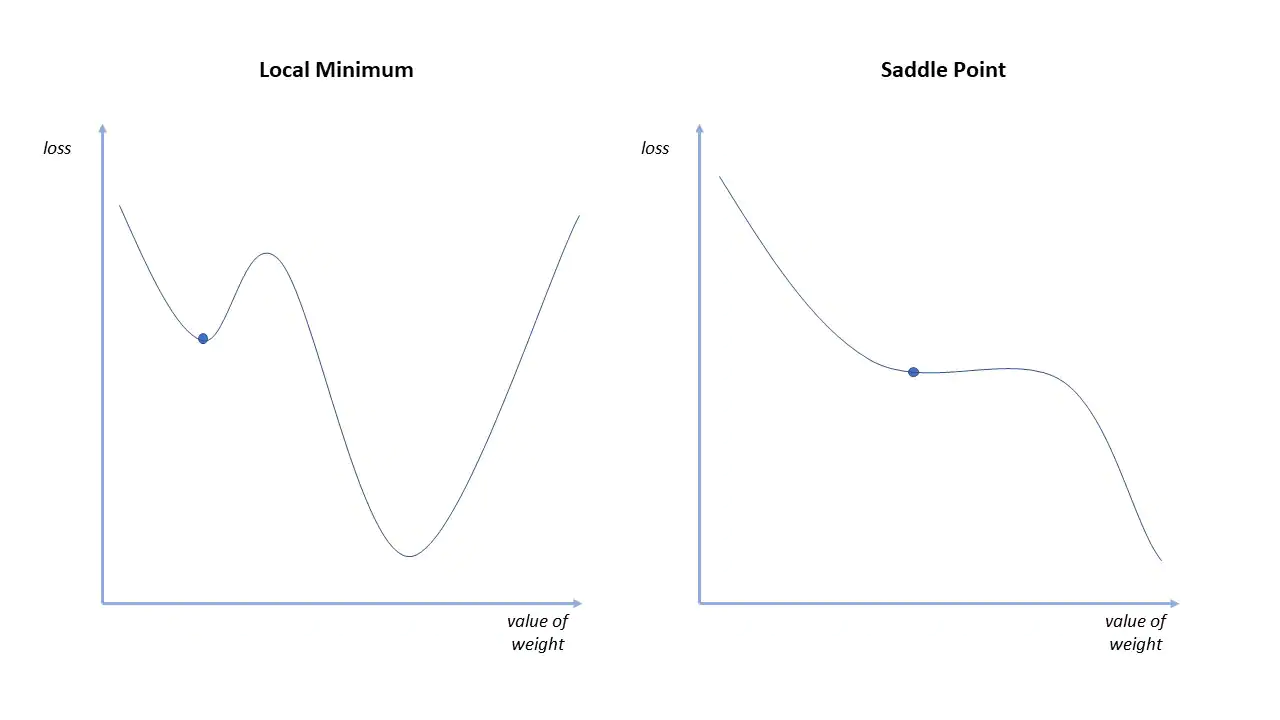
Ref: https://www.ibm.com/cloud/learn/gradient-descent

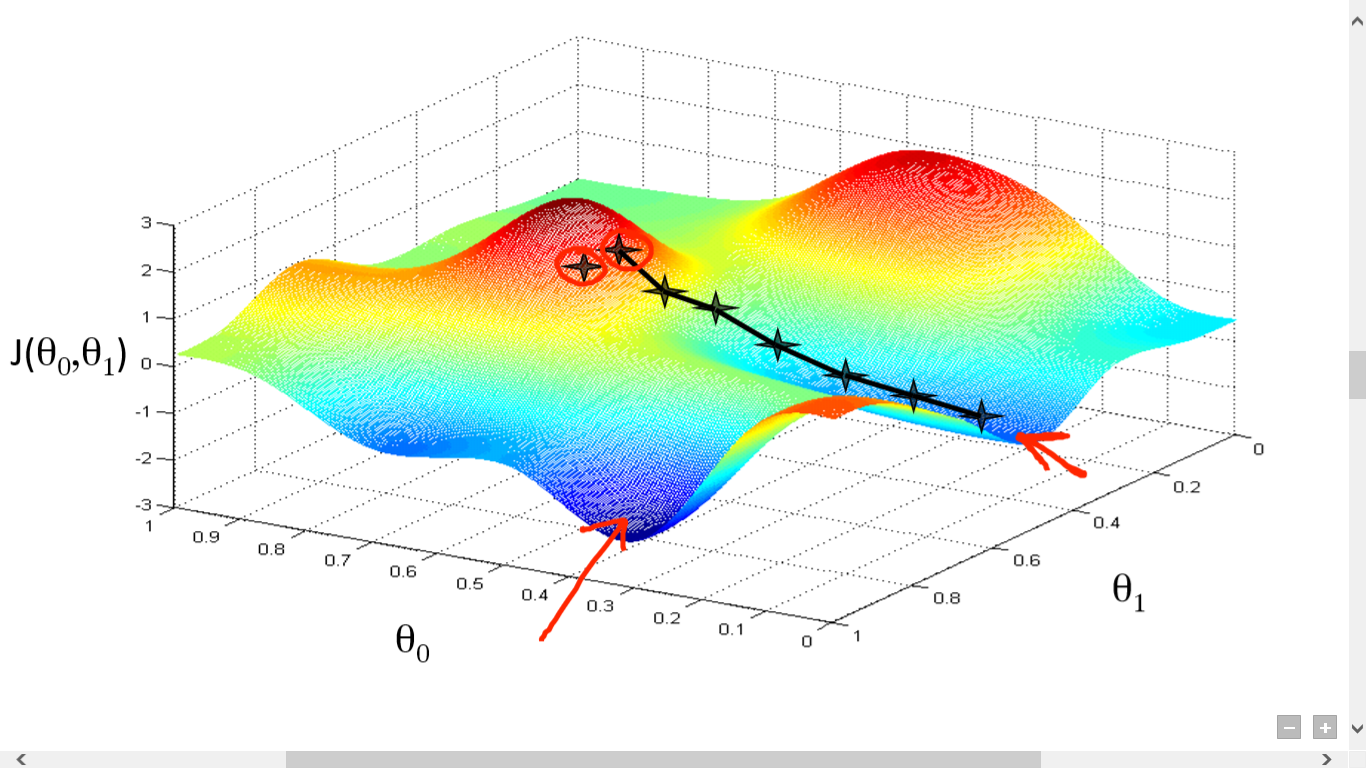
Ref: https://towardsdatascience.com/linear-regression-cost-function-gradient-descent-normal-equations-1d2a6c878e2c

### Checkout: http://playground.tensorflow.org/

- Play around with what data is being classified
    - Amount of noise present in it etc
- Number of layers
- Number of neurons per layer
- Types of inputs etc

### Simple example of digit classification using Keras library

Commonly used ML libraries include
- Tensorflow
- Keras
- Pytorch
- sklearn

In [1]:
## This is generally done on top of the notebook but I'm doing it here for the sake of clear sections

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
print("We're using TF", tf.__version__)
import keras
print("We are using Keras", keras.__version__)

We're using TF 2.8.0
We are using Keras 2.8.0


In [13]:
# We're loading the data of 50,000 28*28 images of digits from 0 to 9
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

#Print the data shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


A closeup of a sample patch:


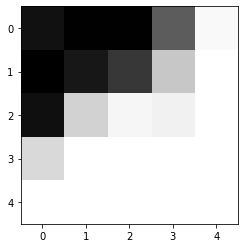

And the whole sample:


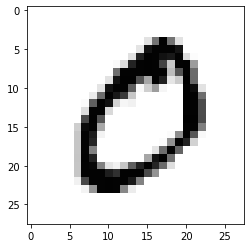

In [14]:
#Visualize the data

print("A closeup of a sample patch:")
plt.imshow(X_train[1, 10:15, 10:15], cmap="Greys")
plt.show()

print("And the whole sample:")
plt.imshow(X_train[1], cmap="Greys")
plt.show()

In [5]:
# flatten images
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print(X_train.shape, X_train_flat.shape)

X_test_flat = X_test.reshape((X_test.shape[0], -1))
print(X_test.shape, X_test_flat.shape)

(60000, 28, 28) (60000, 784)
(10000, 28, 28) (10000, 784)


In [6]:
# one-hot encode the target
y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
y_test_oh = tf.keras.utils.to_categorical(y_test, 10)

print(y_train_oh.shape)
print(y_train_oh[:3], y_train[:3])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] [5 0 4]


In [15]:
# building a model with keras
from keras.layers import Dense, Activation
from keras.models import Sequential

# We clear the graph (Remove any models or layers we had initialised previously)
s = tf.compat.v1.reset_default_graph()

model = Sequential()  # it is a feed-forward network without loops like in RNN
model.add(Dense(256, input_shape=(784,)))  # the first layer must specify the input shape (replacing placeholders)
model.add(Activation('sigmoid'))
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [16]:
# Read a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trai

In [17]:
# now we "compile" the model specifying the loss and optimizer
model.compile(
    loss='categorical_crossentropy', # this is our cross-entropy
    optimizer='adam',
    metrics=['accuracy']  # report accuracy during training
)

In [18]:
# and now we can fit the model with model.fit()
# and we don't have to write loops and batching manually as in TensorFlow
model.fit(
    X_train_flat, 
    y_train_oh,
    batch_size=512, 
    epochs=40,
    validation_data=(X_test_flat, y_test_oh),
    callbacks=[],
    verbose=1
)

Epoch 1/40
118/118 [==============================] - 2s 16ms/step - loss: 0.7490 - accuracy: 0.8197 - val_loss: 0.3246 - val_accuracy: 0.9124
Epoch 2/40
118/118 [==============================] - 1s 12ms/step - loss: 0.2865 - accuracy: 0.9194 - val_loss: 0.2556 - val_accuracy: 0.9279
Epoch 3/40
118/118 [==============================] - 2s 13ms/step - loss: 0.2347 - accuracy: 0.9327 - val_loss: 0.2091 - val_accuracy: 0.9421
Epoch 4/40
118/118 [==============================] - 1s 12ms/step - loss: 0.2028 - accuracy: 0.9412 - val_loss: 0.1930 - val_accuracy: 0.9418
Epoch 5/40
118/118 [==============================] - 1s 12ms/step - loss: 0.1874 - accuracy: 0.9447 - val_loss: 0.1852 - val_accuracy: 0.9442
Epoch 6/40
118/118 [==============================] - 2s 14ms/step - loss: 0.1782 - accuracy: 0.9473 - val_loss: 0.1777 - val_accuracy: 0.9445
Epoch 7/40
118/118 [==============================] - 1s 12ms/step - loss: 0.1745 - accuracy: 0.9480 - val_loss: 0.1797 - val_accuracy: 0.9460

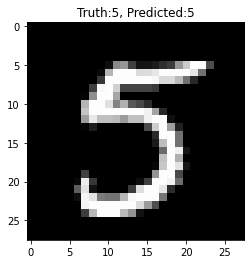

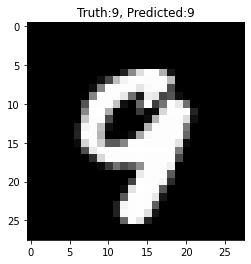

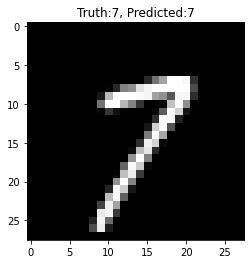

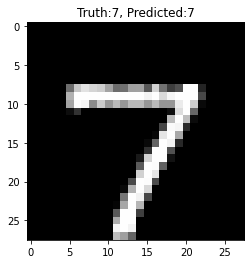

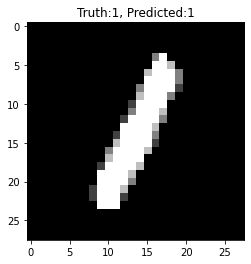

In [19]:
for i in range(5):
    num = np.random.randint(10000)
    
    x = X_test[num].flatten()
    x = x.reshape((1,)+ x.shape)
    prediction = np.argmax(model.predict(x))
    
    plt.figure()
    plt.imshow(X_test[num],cmap = 'gray')
    plt.title("Truth:{}, Predicted:{}".format(y_test[num],prediction))

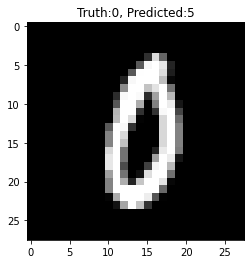

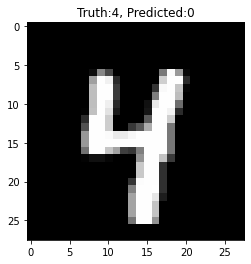

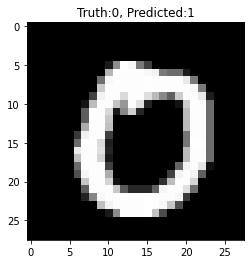

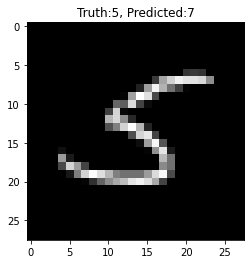

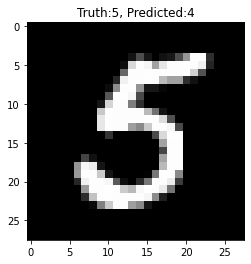

In [20]:
for i in range(5):
    num = np.random.randint(10000)
    prediction = y_test[num]
    
    while(prediction == y_test[num]):
        x = X_test[num].flatten()
        x = x.reshape((1,)+ x.shape)
        
        prediction = np.argmax(model.predict(x))
        num = np.random.randint(10000)
        
    plt.figure()
    plt.imshow(X_test[num],cmap = 'gray')
    plt.title("Truth:{}, Predicted:{}".format(y_test[num],prediction))

